***SPAM MAIL PREDICTION***
*First the data needs to be uploaded-->Pre-processing of data-->feature exctraction, train-test-split, SVM Model, Trained model, Tested to find whether it is spam/ham mail*


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
raw_mail_data=pd.read_csv('mail_data.csv')
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
raw_mail_data.shape

(5572, 2)

In [ ]:
#replace null values with null string
df=raw_mail_data.where((pd.notnull(raw_mail_data)),'')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#spam mail=0, ham mail=1

df.loc[df['Category']=='ham','Category']=1
df.loc[df['Category']=='spam','Category']=0
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
y=df.Category
x=df.Message
print(y)
print(x)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
##splitting to test and train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

print(x_train.shape,y_train.shape)

(4457,) (4457,)


**Feature extraction**

In [ ]:
#transforming the text data to feature vectors that can be used as input to logistic regression

fea_ext=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
#messages in x_train,x_test stored in x_train_features
#fit mails into vectorizer function and transforming data into fetaure vectors which are numerical values
#We dont want our model to look at the test data, so we dont use fit in test data
x_train_features=fea_ext.fit_transform(x_train)

x_test_features=fea_ext.transform(x_test)

#converting y train and y_test as integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [ ]:
print(x_train_features)

In [ ]:
print(x_test_features)

**Training Model using logistic regression**

In [ ]:
classifier=LogisticRegression()
classifier.fit(x_train_features,y_train)

from sklearn.metrics import accuracy_score
prediction=classifier.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction)

print(f'Accuracy on training data:{accuracy_on_training_data}')

pred=classifier.predict(x_test_features)
accuracy_on_testing_data=accuracy_score(y_test,pred)
print(f'Accuracy on testing data:{accuracy_on_testing_data}')

Accuracy on training data:0.9670181736594121
Accuracy on testing data:0.9659192825112107


Text(42.0, 0.5, 'Truth')

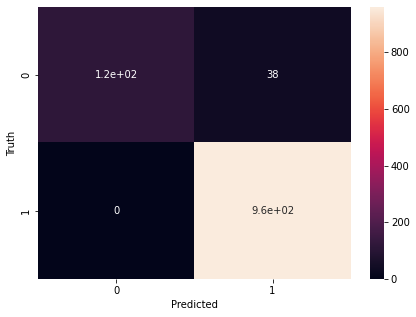

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test_features)
cm = confusion_matrix(y_test, y_pred)
cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Prediction**

In [ ]:
input_mail=['Hi! I am happy that I recieved a mail','Urgent! mail me soon']
input_mail_feature_ext=fea_ext.transform(input_mail)
pred=classifier.predict(input_mail_feature_ext)
print(pred)

for i in pred:
  if i==0:
     print(f'spam mail')
  else:
     print(f"It's not a spam!")

[1 1]
It's not a spam!
It's not a spam!
